In [1]:
import os
import sys
import warnings
import pickle

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evolutionary_search import EvolutionaryAlgorithmSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from functools import partial

from tests import train_test_split_intime, train_test_split_kfold
from tests import train_test_split_intime_smote, train_test_split_kfold_smote
from tests import train_test_split_intime_resample, train_test_split_kfold_resample
from tests import train_test_split_intime_adasyn, train_test_split_kfold_adasyn

from tests import test_intime, test_kfold
from tests import test_pdf_representation, test_intime_pdf_representation

#%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df_train = pd.read_pickle('data_train.pkl')
df_test = pd.read_pickle('data_test.pkl')

In [3]:
target = ['discretize_s4', ]
predictors = [i for i in df_train.columns if i not in target]
score_function = roc_auc_score

# Sem Oversamplig

### Teste básico com validação cruzada

0.39021545725208306


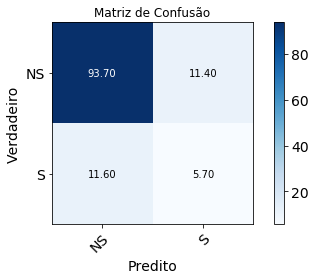

In [4]:
# simple Kfold cross validation
clf = DecisionTreeClassifier(random_state=0)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold, 
           clf, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

0.446546052631579


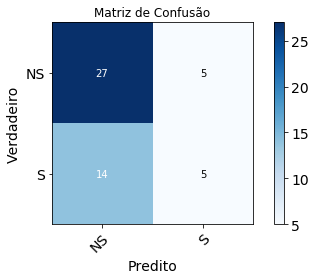

In [5]:
clf = DecisionTreeClassifier(random_state=0)

test_intime(df_train,
            df_test,
            train_test_split_intime,
            clf,
            score_function,
            predictors,
            target)

# Oversampling Glauston

### Teste básico com validação cruzada

0.40540933354473874


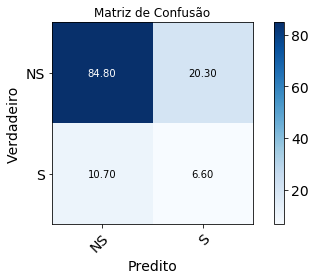

In [6]:
clf = DecisionTreeClassifier(random_state=0)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_resample, 
           clf, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

0.4358552631578947


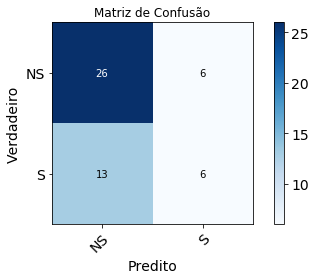

In [7]:
clf = DecisionTreeClassifier(random_state=0)

test_intime(df_train,
            df_test,
            train_test_split_intime_resample,
            clf,
            score_function,
            predictors,
            target)

# Oversampling Smote

### Teste básico com validação cruzada

0.4074643693955571


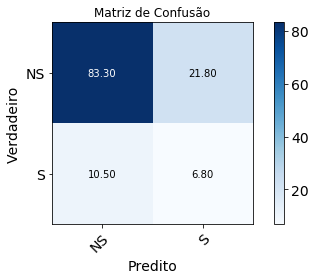

In [9]:
clf = DecisionTreeClassifier(random_state=0)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_smote,
           clf, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

0.5353618421052632


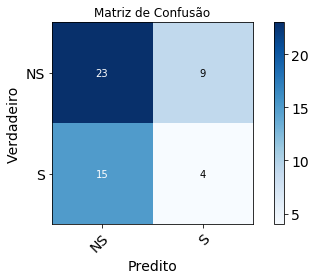

In [11]:
clf = DecisionTreeClassifier(random_state=0)

test_intime(df_train,
            df_test,
            train_test_split_intime_smote,
            clf,
            score_function,
            predictors,
            target)

# Oversampling Adasyn

### Teste básico com validação cruzada

0.3918425735073904


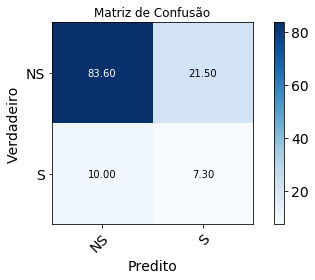

In [12]:
clf = DecisionTreeClassifier(random_state=0)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_adasyn, 
           clf, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

0.4407894736842105


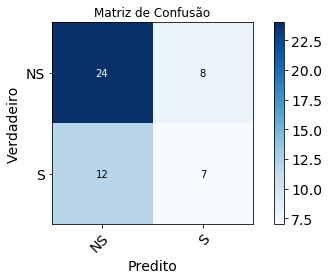

In [13]:
clf = DecisionTreeClassifier(random_state=0)

test_intime(df_train,
            df_test,
            train_test_split_intime_adasyn,
            clf,
            score_function,
            predictors,
            target)

# Oversamplig Glauston + PDF representation

### Teste básico com validação cruzada

In [14]:
clf = DecisionTreeClassifier(random_state=0)

test_pdf_representation(df_train, 
           df_test, 
           train_test_split_kfold, 
           clf, score_function, 
           predictors, 
           target)

ValueError: Shape of passed values is (1100, 13), indices imply (1100, 14)

### Teste básico com separação no tempo

In [15]:
clf = DecisionTreeClassifier(random_state=0)

test_intime_pdf_representation(df_train,
                               df_test,
                               train_test_split_intime,
                               clf,
                               score_function,
                               predictors,
                               target)

ValueError: Shape of passed values is (1224, 13), indices imply (1224, 14)